<a href="https://colab.research.google.com/github/Cristiano1120/datascience/blob/main/MVP3_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP_3 - Sprint: Engenharia de Dados

*Aluno: Cristiano Rodrigues Marques*

# **COLETA DOS DADOS:**

Escolha do Conjunto de Dados: Used-Car Data

***Os dados foram extraídos no Kaggle no link abaixo:***

url:https://www.kaggle.com/datasets/deepshikhaagarwal89/user-car-data

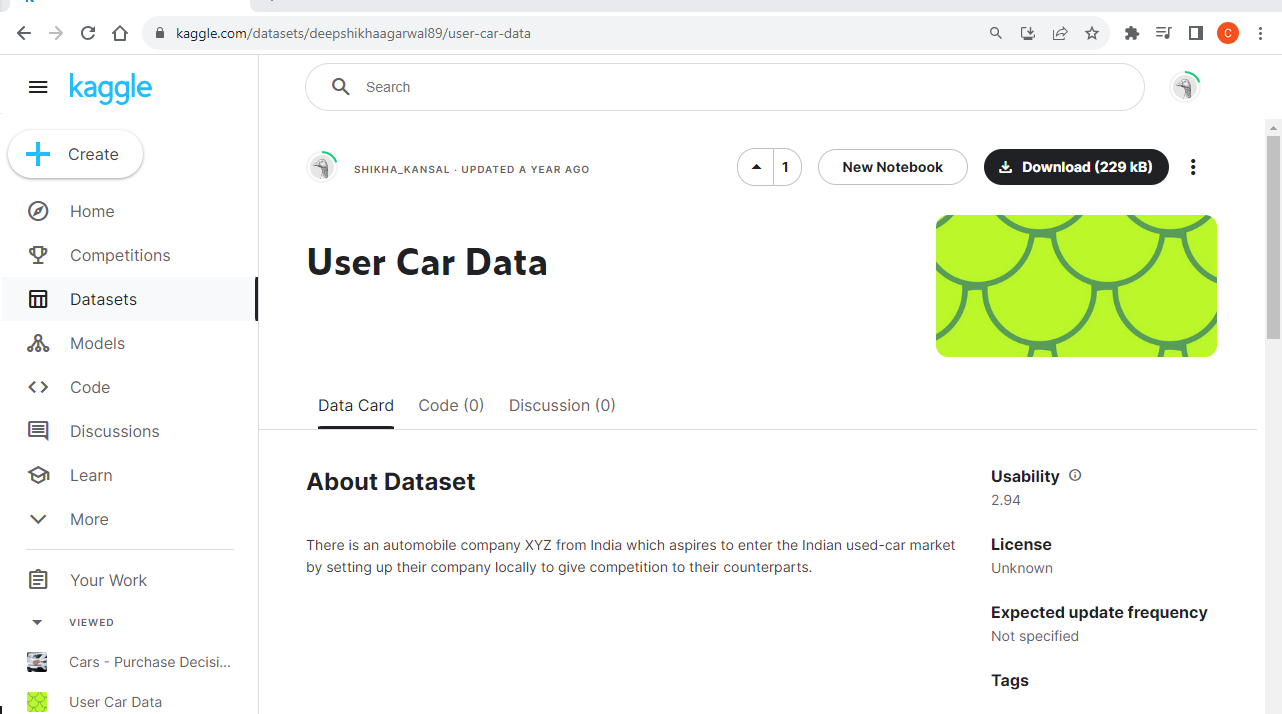

***Sobre o conjunto de dados:***

Com base em diversas pesquisas de mercado, uma empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros usados no mercado.

# Objetivo Geral

Este trabalho tem como objetivo, realizar uma análise primária, em uma base de dados gratuita disponível na web,  e caberá a análise exploratória identificar as tendências e padrões relevantes segundo os dados a serem analisados. Entretanto, temos como objetivo inicial verificar a qualidade dos dados e realizar uma análise entre as relações entre os atributos do conjunto de dados.

Definição de cada um dos atributos presentes no dataset:

•	Sales_ID: um número inteiro que representa o ID de venda do veículo;

•	Name: o nome do modelo do veículo;

•	Year: o ano de fabricação do veículo;

•	Selling_price: o preço de venda do veículo em rúpias indianas (INR);

•	Km_driven: a quilometragem percorrida pelo veículo em quilômetros (km);

•	Region: a região geográfica em que o veículo está sendo vendido;

•	State or Province: o estado ou província em que o veículo está sendo vendido;

•	City: a cidade em que o veículo está sendo vendido;

•	Fuel: o tipo de combustível usado pelo veículo (gasolina, diesel, etc.);

•	Seller_type: o tipo de vendedor (concessionária, proprietário particular, etc.);

•	Transmission: o tipo de transmissão do veículo (manual, automático, etc.);

•	Owner: o número de proprietários anteriores do veículo;

•	Mileage: a quilometragem média do veículo em km/l (quilômetros por litro);

•	Engine: a capacidade do motor do veículo em cc (centímetros cúbicos);

•	Max_power: a potência máxima do motor do veículo em bhp (cavalos-vapor);

•	Seats: o número de assentos no veículo;

•	Sold: um indicador booleano que indica se o veículo foi vendido ou não.


# Primeiras Analises do Conjunto de Dedos

Quanto a estrutura

> O Dataset apresenta 7906 instâncias e 18 atributos;

> Não há valores Missing;

> Aparentemente não temos a presença de valores nulos;

# Algumas considerações a respeito das correlações existentes entre os atribuos:

1) A variável "year" (ano de fabricação) tem uma correlação positiva significativa com o "selling_price" (preço de venda). Isso sugere que carros mais recentes tendem a ter preços de venda mais altos;

2) "mileage" (quilometragem) tem uma correlação negativa significativa com "selling_price", o que significa que carros com maior quilometragem geralmente têm preços de venda mais baixos, entre outras informações pertinentes.




# Após a breve analise de dados, restringiremos para as proxímas analises e estruturação de banco de dados, os principais atributos elegidos pelo autor, são eles:

Registro da venda (Sales_ID)

Valor da venda (Selling_price)

Nome ou marca do veículo (Name).

Tipo de combustivel (Fuel);

Tipo de transmissão (Transmission);

Estados do veiculo (vendido ou não vendido).



# Outrossim, agorá pretendemos responder a outras questões  após a escolha do Conjunto de Dados, são elas:

A relação entre marcas e preço de venda;

A relação entre tipo de combustivel e preço de venda;

A relação entre transmissão e o preço de venda;

entre outros.

# Pacotes Importantres

In [80]:
# importar os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ocultar Warning
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importanto o Conjunto de Dados

In [82]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Cristiano1120/datascience/main/UserCarData.csv"

# Lê o arquivo
carros_usados = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
carros_usados.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [83]:
# Tipos dos dados
carros_usados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [6]:
# Check de informações duplicadas
carros_usados.duplicated().sum()

0

In [48]:
# Verificar se há missing
carros_usados.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

In [49]:
# Exibir as primeiras linhas
carros_usados.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [50]:
# Analises estatisticas
carros_usados.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [51]:
# Correlação entre os atributos
carros_usados.corr()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
Sales_ID,1.000000,-0.001304,-0.012125,0.009556,0.028627,-0.011279,-0.003717,-0.014154
year,-0.001304,1.000000,0.412302,-0.428548,0.328544,0.018263,0.226598,-0.007923
selling_price,-0.012125,0.412302,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617
km_driven,0.009556,-0.428548,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259
mileage,0.028627,0.328544,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700
engine,-0.011279,0.018263,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103
max_power,-0.003717,0.226598,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999
seats,-0.014154,-0.007923,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000


# Investigando as Premissas

# *Status de vendas versus Marca*

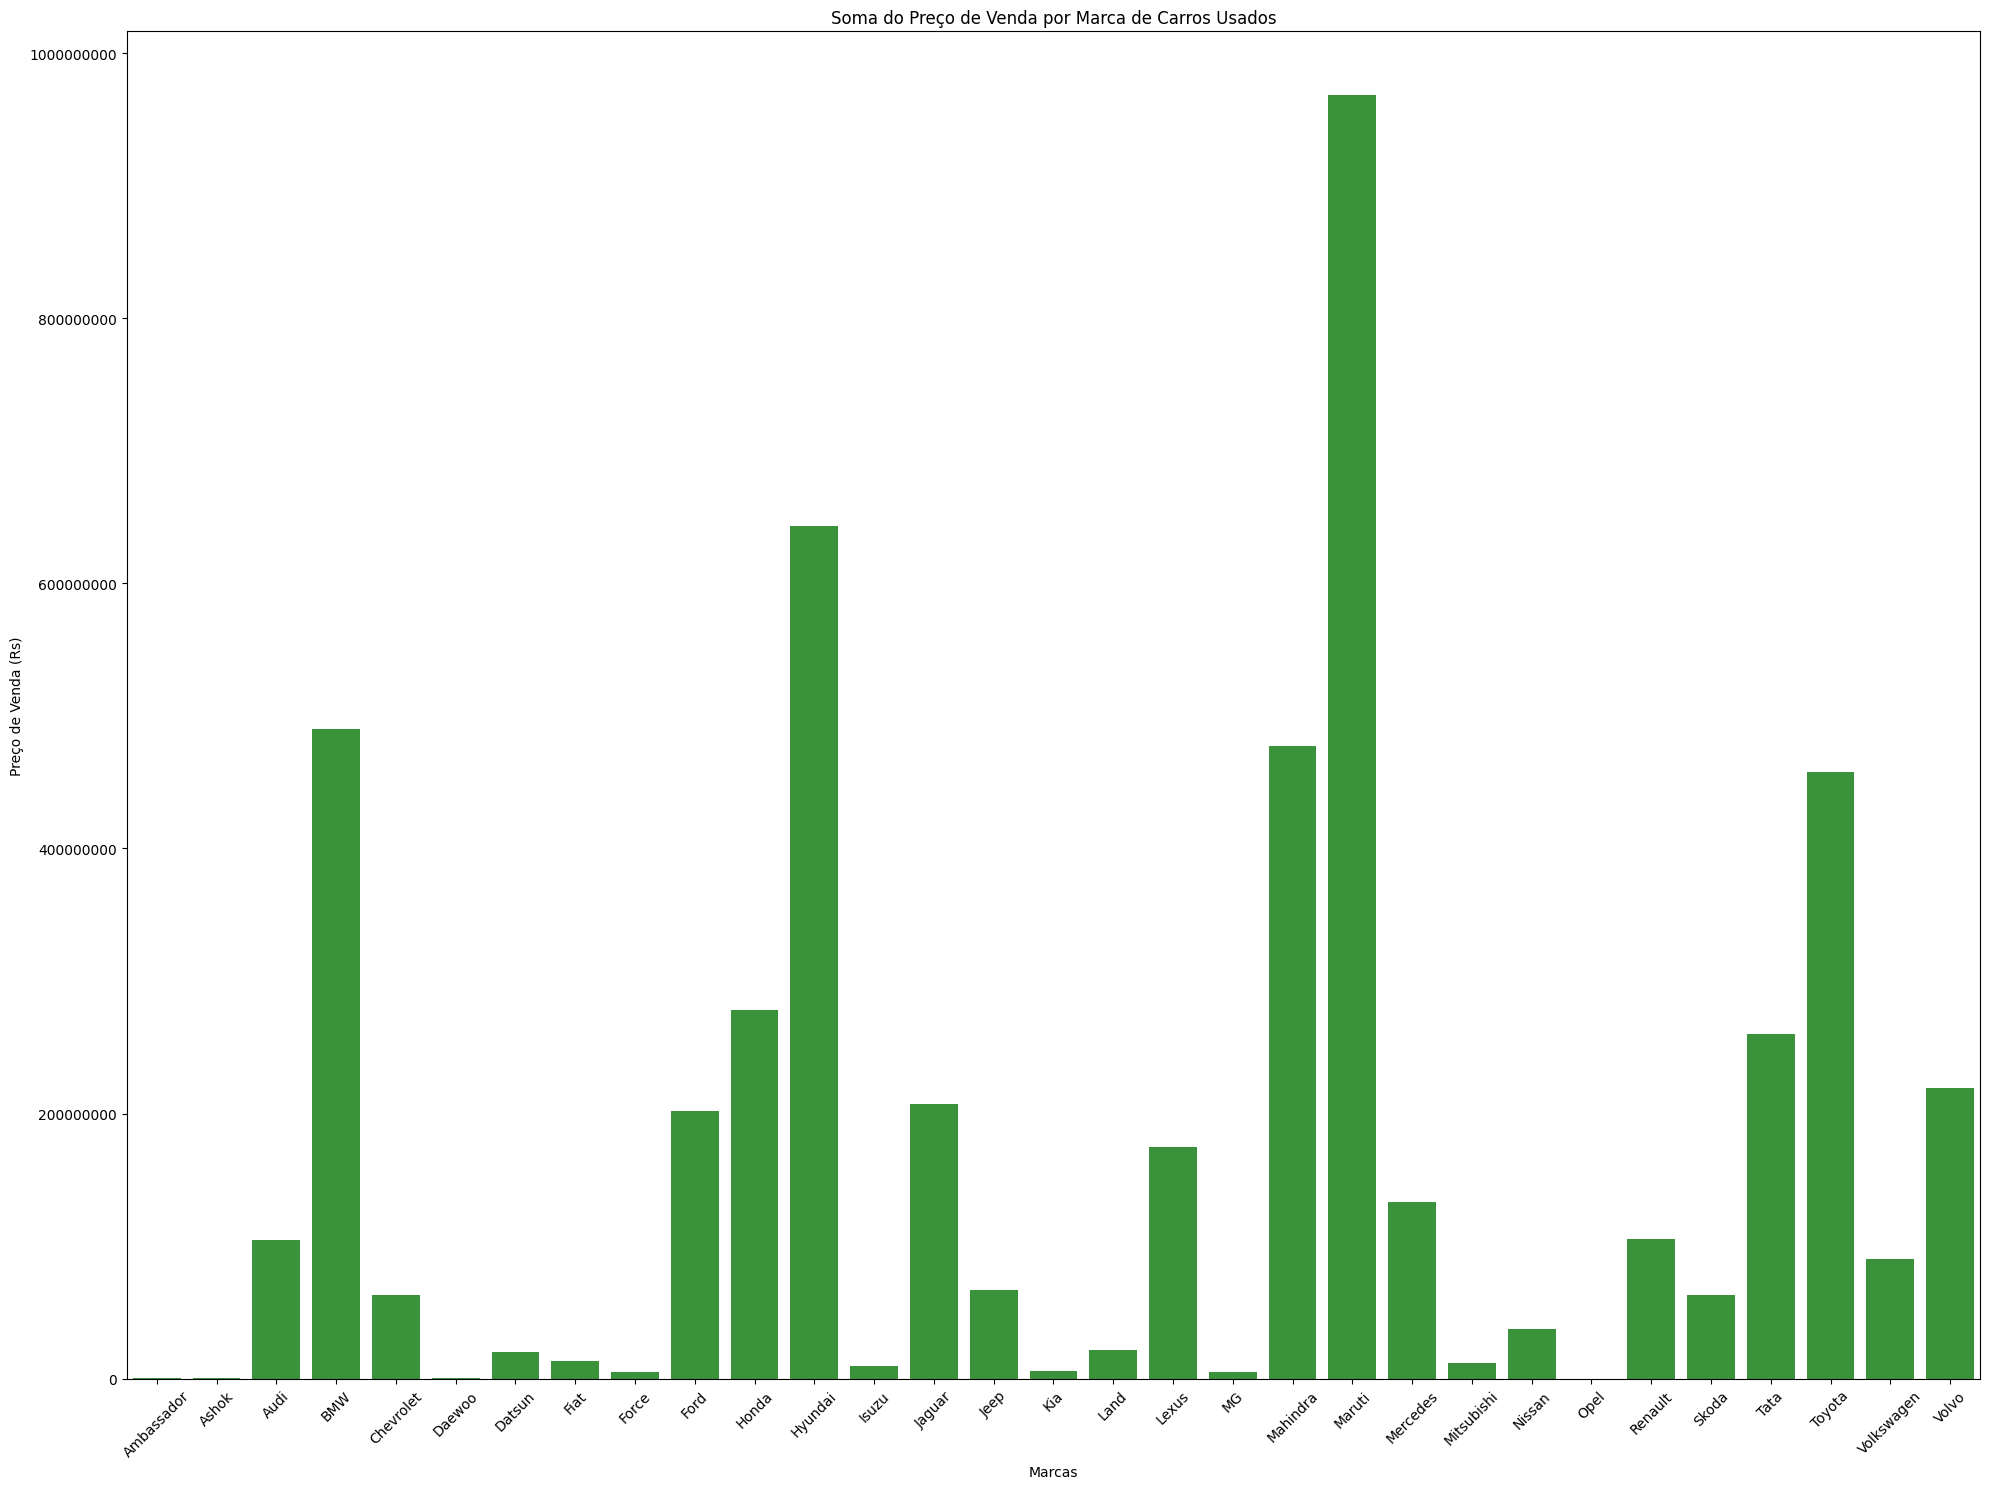

In [87]:
# Agrupa os dados por marca e calcula a soma do preço de venda
brand_selling_price_sum = carros_usados.groupby('name')['selling_price'].sum().reset_index()

# Configura a figura do gráfico
plt.figure(figsize=(20, 15))

# Cria o gráfico de barras usando sns.barplot
base_color = sns.color_palette()[2]
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
sns.barplot(x=brand_selling_price_sum['name'], y=brand_selling_price_sum['selling_price'], color=base_color)

# Define o título do gráfico
plt.title('Soma do Preço de Venda por Marca de Carros Usados')

# Define os rótulos dos eixos x e y
plt.ylabel('Preço de Venda (Rs)')
plt.xlabel('Marcas')

# Rotaciona os rótulos do eixo x verticalmente para melhor legibilidade
plt.xticks(rotation=45)

# Exibe o gráfico
plt.tight_layout()
plt.show()

Segundo o gráfico acima temos o indicativo que as marcas Mariuti, Hyundai, BMW e Mahindratem possuem o preço de venda mais alto em relação as demais marcas, o que pressupoem que são produtos mais caros.

# ***Status de vendas versus Tipos de combustiveis***



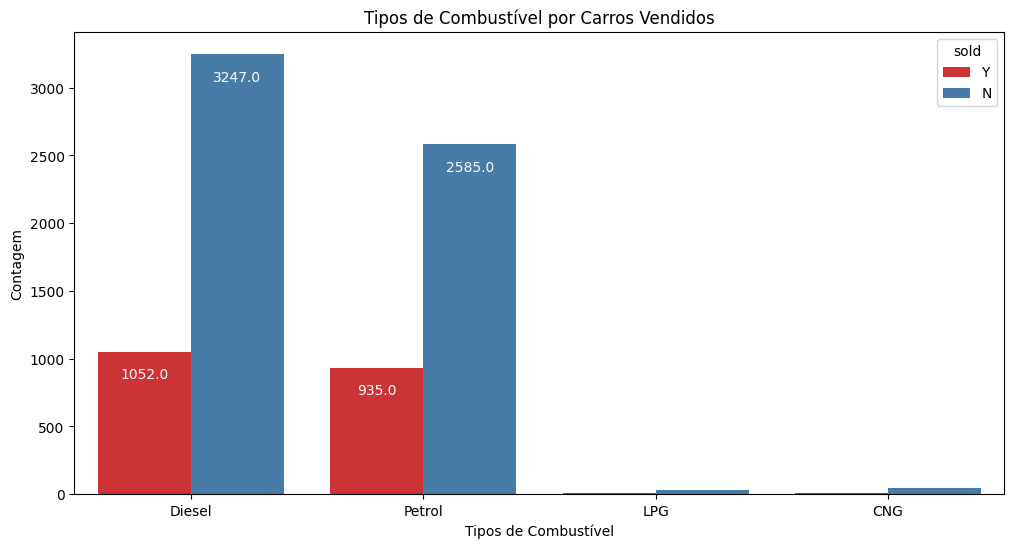

In [3]:
# Configura a figura do gráfico
plt.figure(figsize=[12, 6])

# Cria o gráfico de contagem usando sns.countplot com a paleta de cores personalizada
ax = sns.countplot(data = carros_usados,x = 'fuel',hue ='sold',palette = 'Set1')

# Define o título do gráfico
ax.set_title('Tipos de Combustível por Carros Vendidos')

# Define os rótulos dos eixos x e y
ax.set_xlabel('Tipos de Combustível')
ax.set_ylabel('Contagem')

# Adiciona anotações de texto acima das barras para mostrar as contagens
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', color='white', size=10)

# Exibe o gráfico
plt.show()

*A imagem demosntrou que entre os carros usados desse mercado, usam majoritariamente Diesel e Gasolina. Entretanto, os veiculos que utilizam diesel esta a frente entre os carros vendidos.*

# ***Status de vendas versus Tipos de Transmição***

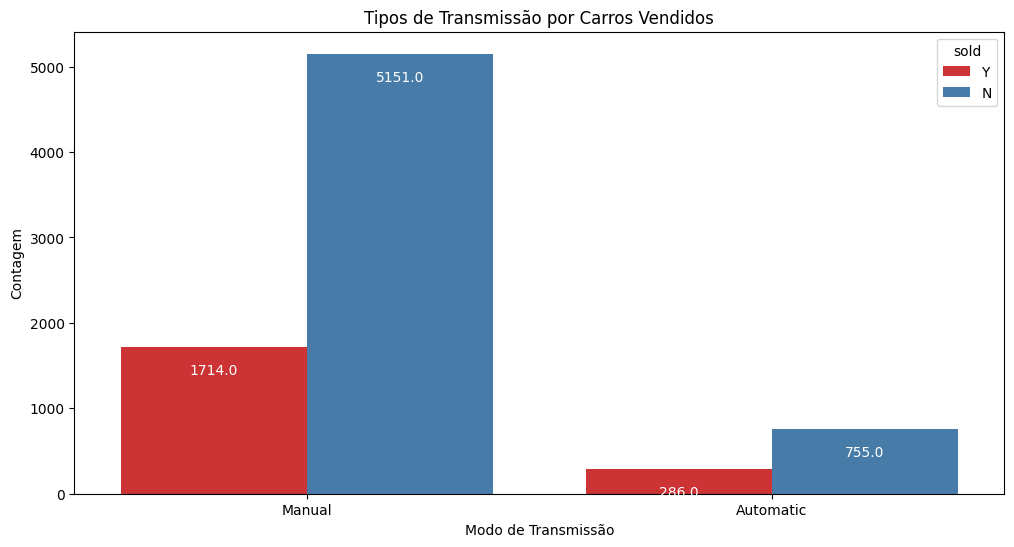

In [19]:
# Configura a figura do gráfico
plt.figure(figsize=[12, 6])

# Cria o gráfico de contagem usando sns.countplot
ax = sns.countplot(data=carros_usados, x='transmission', hue='sold', palette='Set1')

# Define o título do gráfico
ax.set_title('Tipos de Transmissão por Carros Vendidos')

# Define os rótulos dos eixos x e y
ax.set_xlabel('Modo de Transmissão')
ax.set_ylabel('Contagem')

# Adiciona anotações de texto acima das barras para mostrar as contagens
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha='center', va='top', color='white', size=10)

# Exibe o gráfico
plt.show()

*Os automóveis de transmissão manual venderam mais que os veiculos  Automáticos e também tem maior proporção de não vendidos que o Automático.*

# **Modelagem de Banco de Dados**

*Com base nos  atributos escolhidos para a análise, iremos criar um modelo de relacionamento conceitual simples da seguinte forma:*

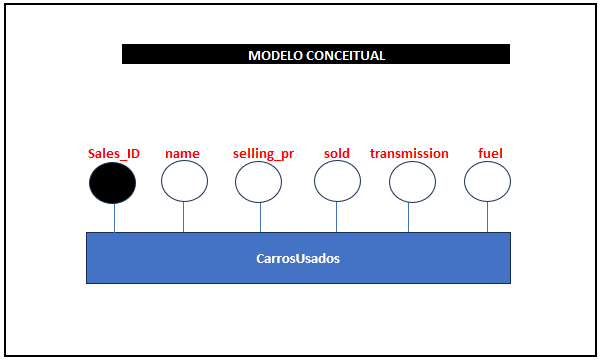

Este é um modelo de relacionamento simples que descreve as principais relações entre as colunas selecionadas do conjunto de dados "usercardata".

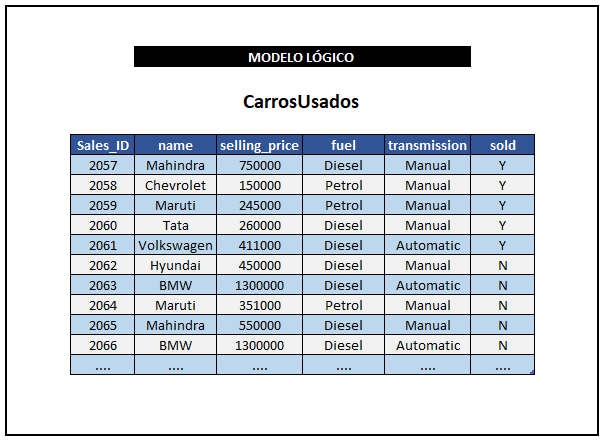

Este modelo lógico representa os atributos escolhidos para o estudo de carros usados. Neste sentido, iremos  criar uma tabela com esses atributos em um formato de banco de dados para armazenar os dados relacionados a esses parâmetros.

# **Restrições de integridade**

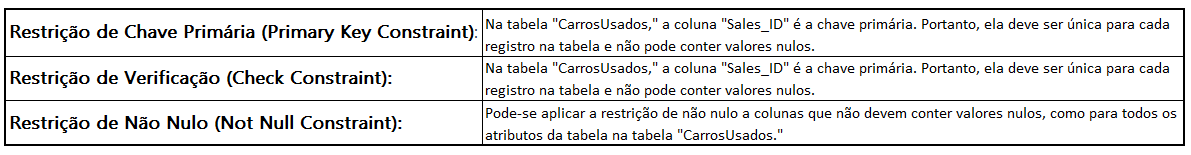

## **Dicionário de Dados**

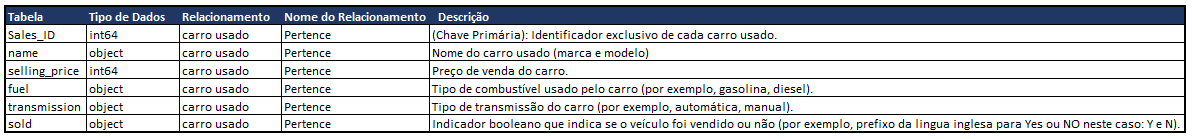

# ***Apartir de agora as seções seguintes trataram dos processos em Ambiente de nuvem:***



***Etapa_1 Upload do Dataset na nuvem (WS);***

*Os dados foram baixados para a maquina local e inseridos manualmente para um bucket do S3.*

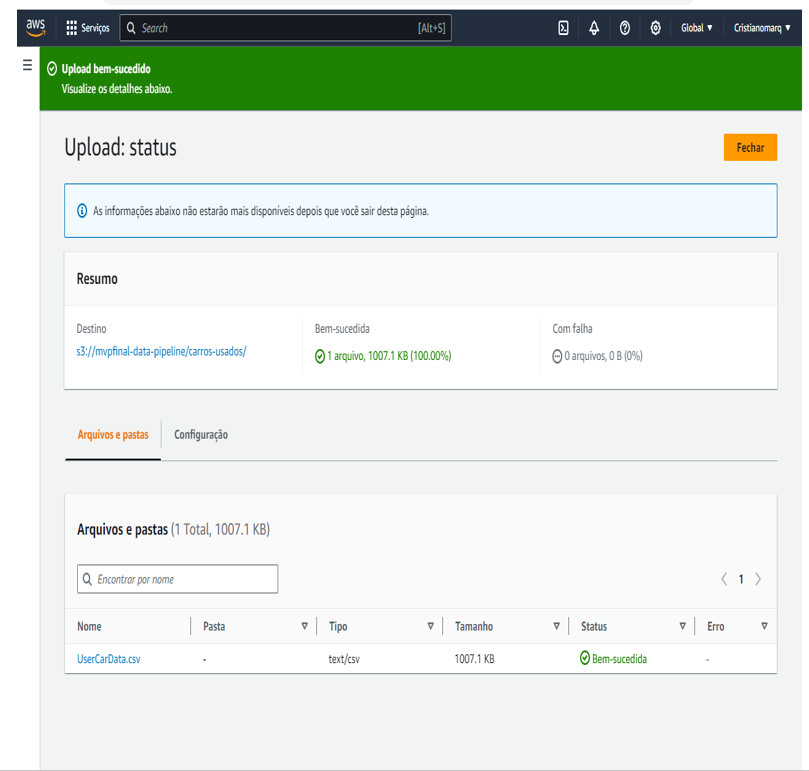

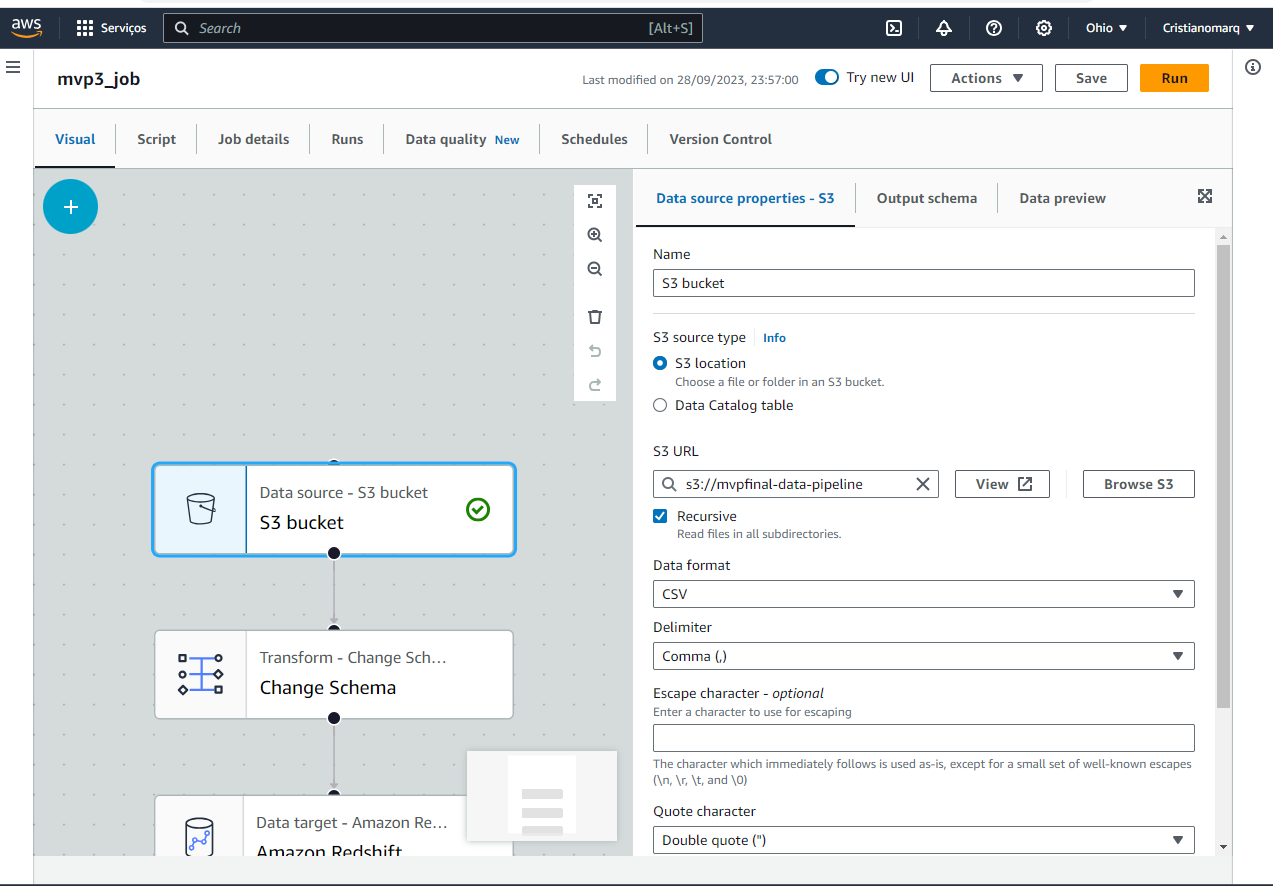

**Etapa_2 Transform - Change Schema**:

Realizou-se a etapa de transformação de dados, convertendo as tipos dos dados das colunas *Sales_ID* e *Selling_price* no de *string* para *int* e as demais: name, fuel, transmission e sold permaneceram com o formato *string* por se tratar de informações de texto e, as demais informações utilizamos o comando *Drop*.

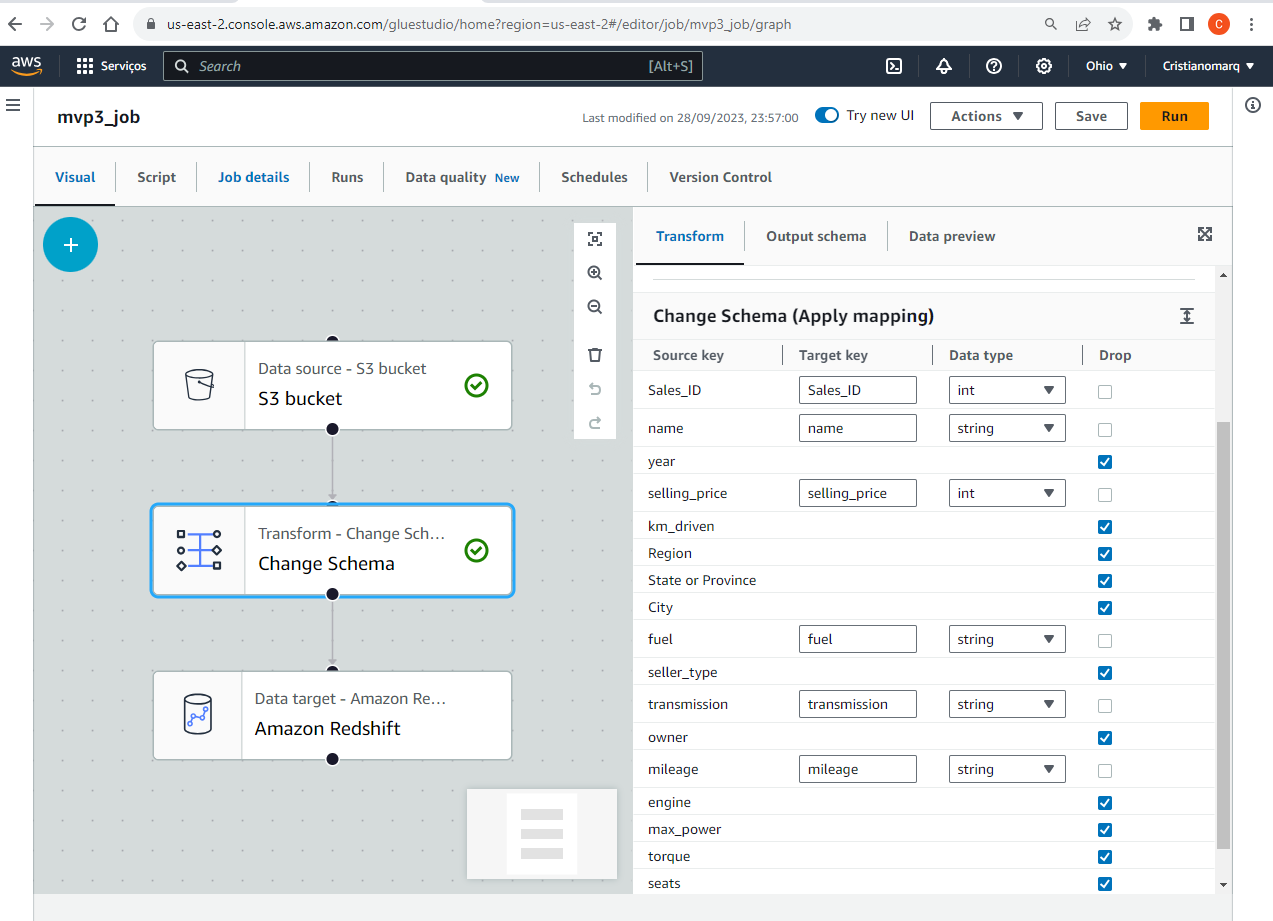

*Output schema*
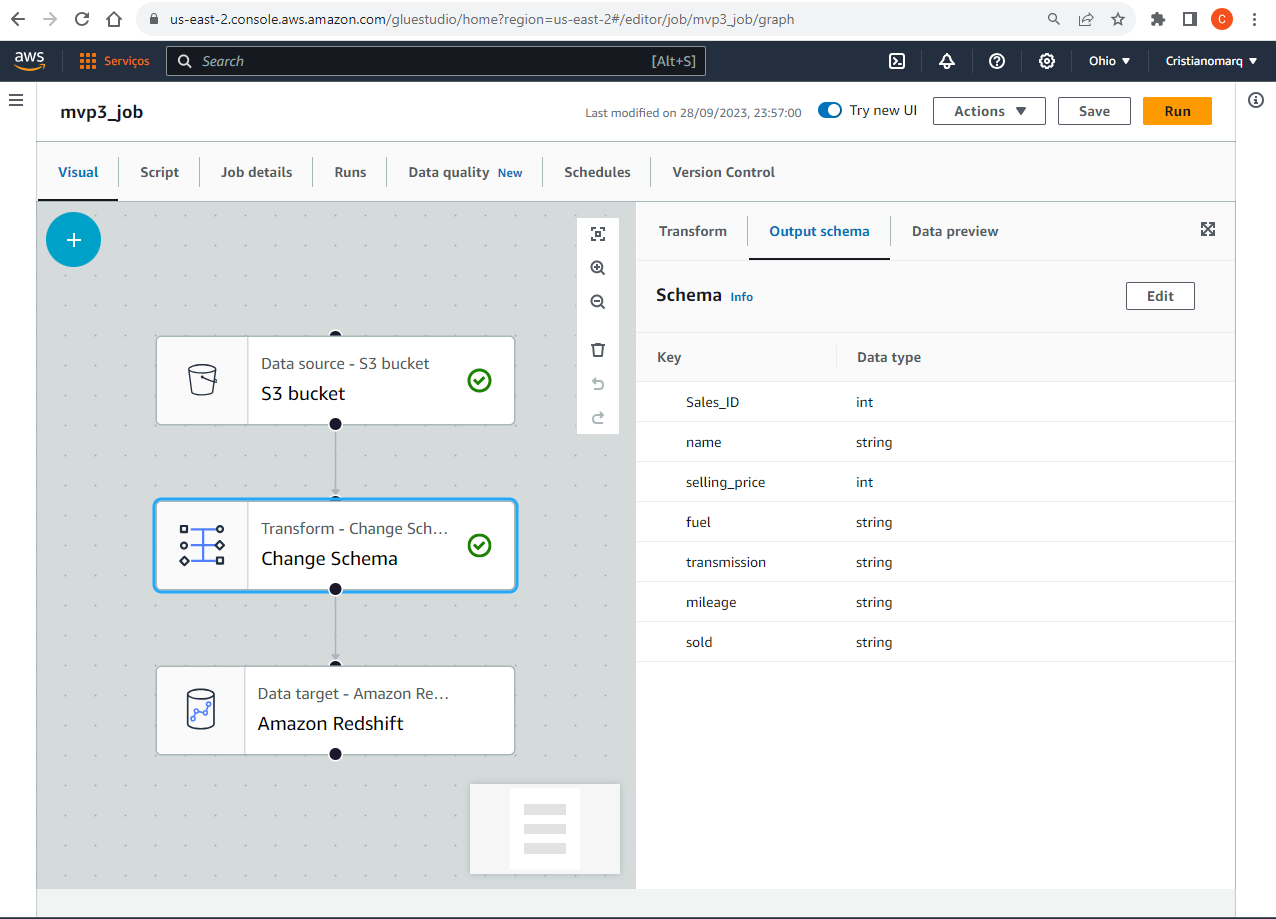

**Etapa_3 Criação do Redshift**

*Definição no Glue do Target para o Redshift*

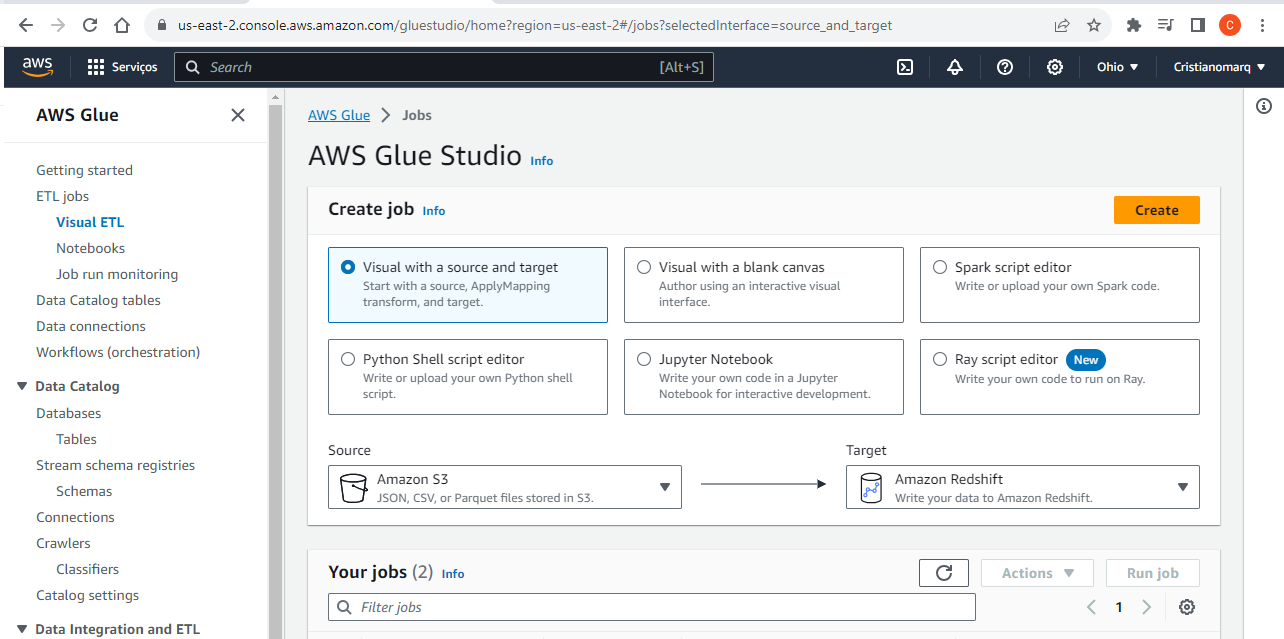

*Detalha o novo Job mvp3_job*

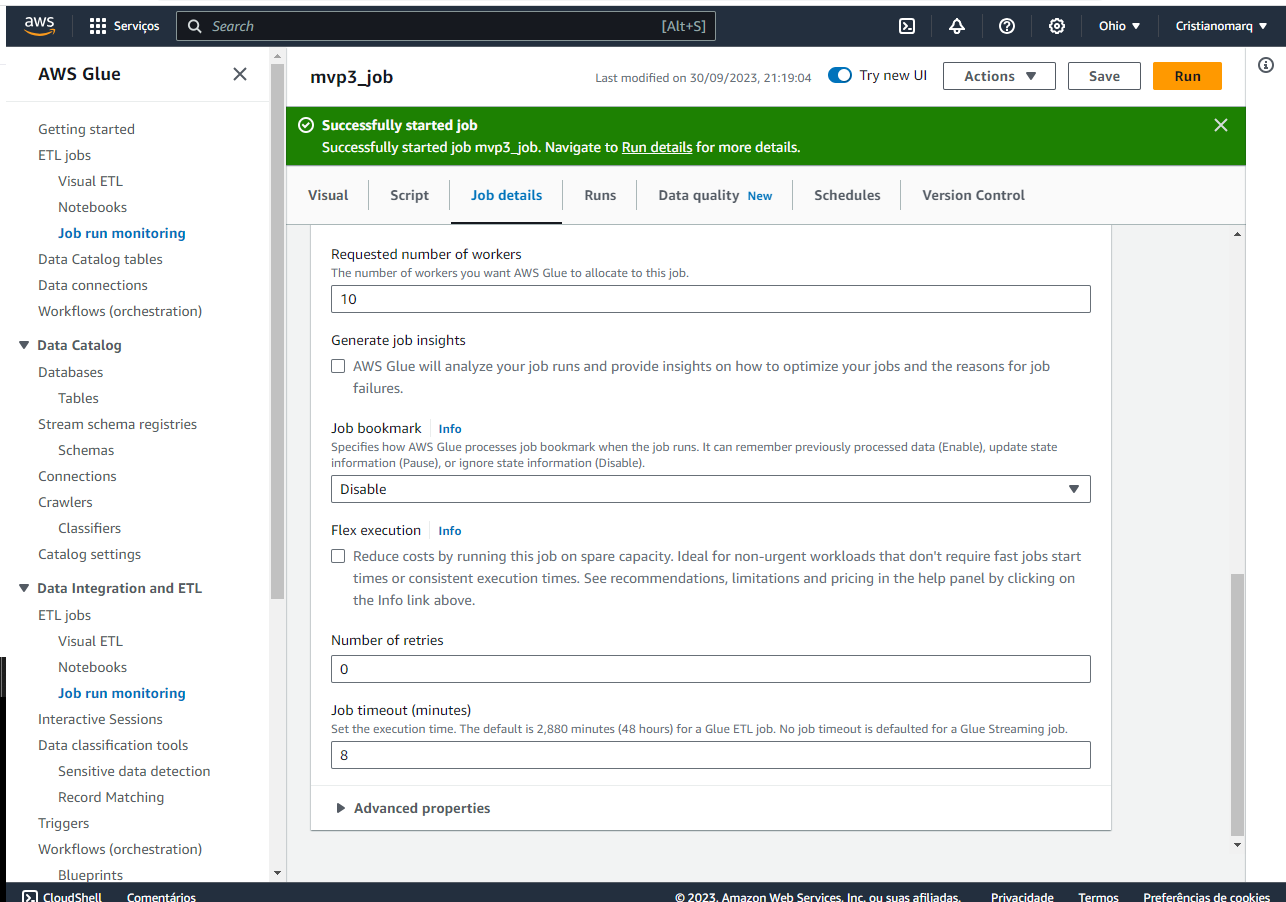

*Configurando Redshift*

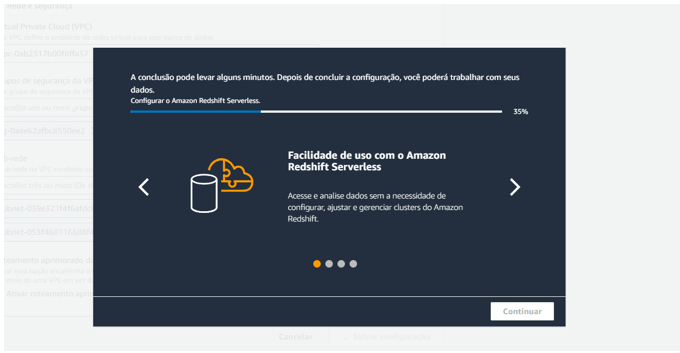

*Nomeado Workspace*

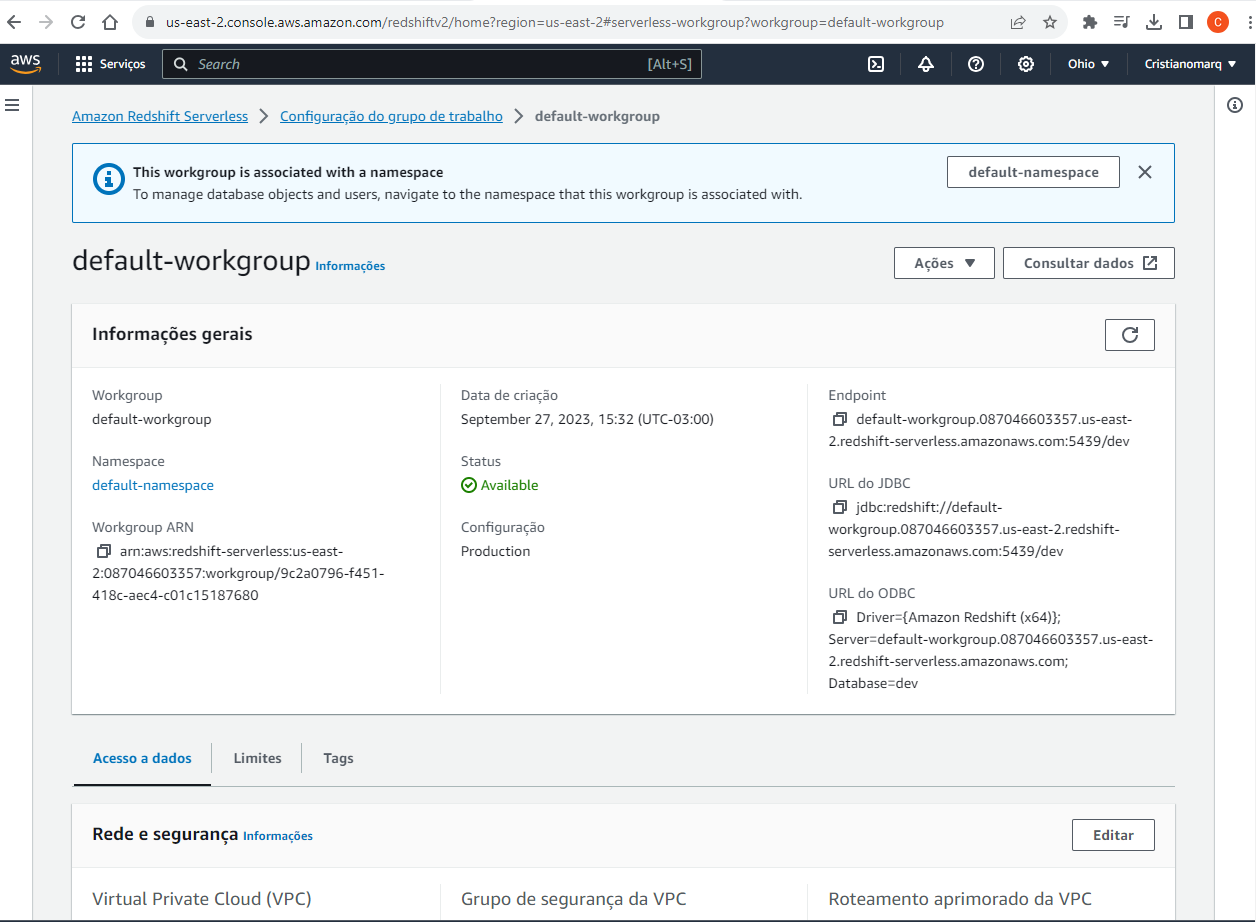

*Validação de conecção do Redshifit*

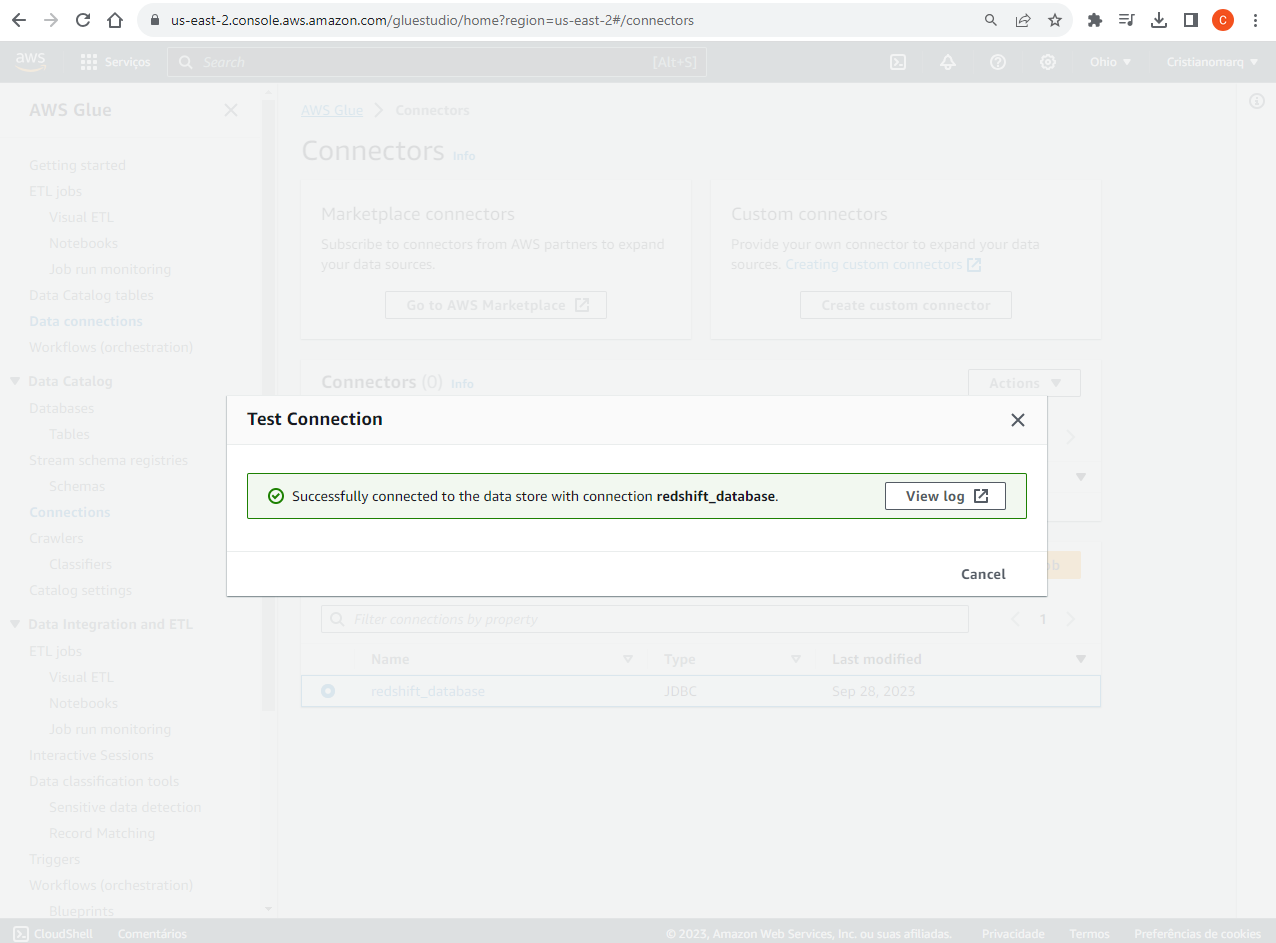

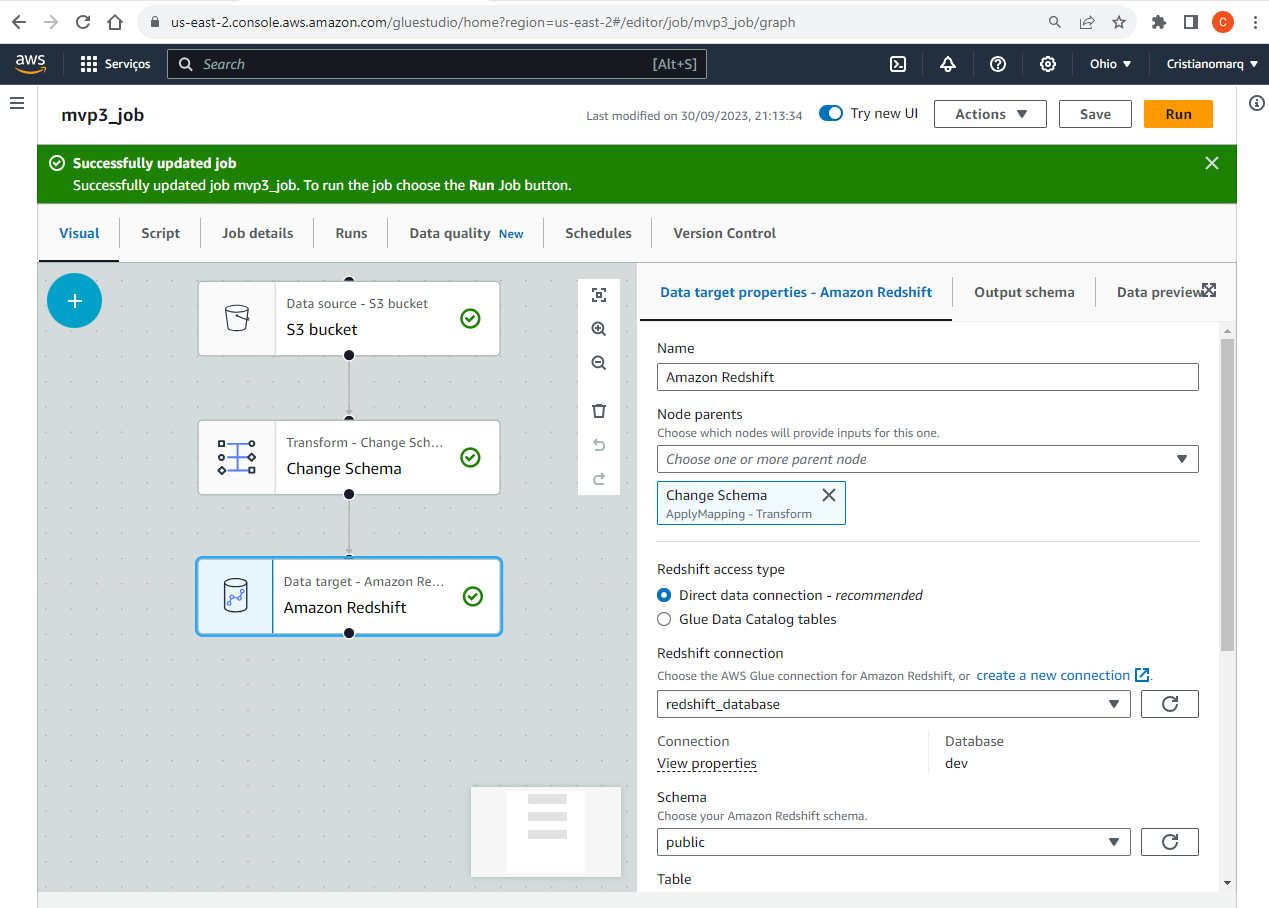

*Job validation*

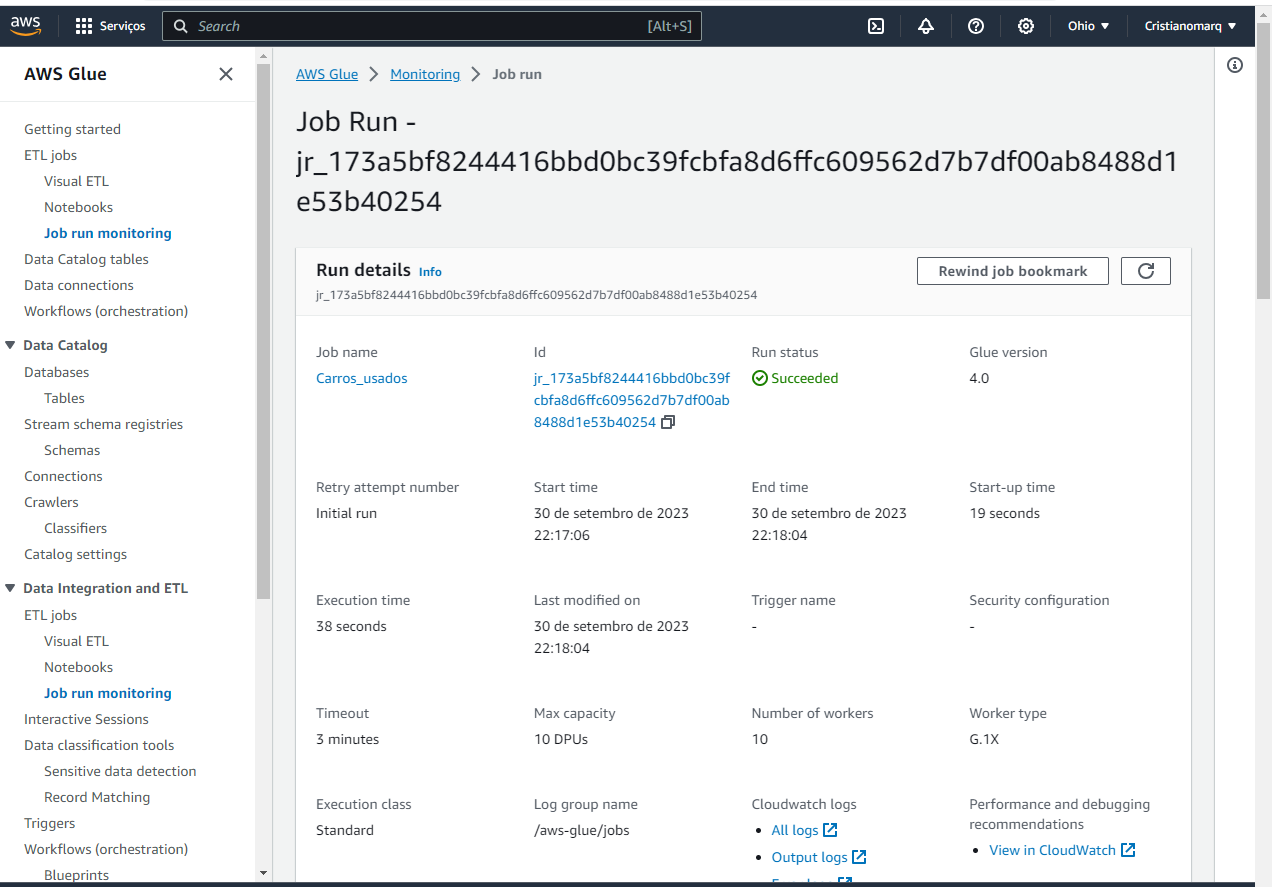

*Ambiente de Editor de Quary*

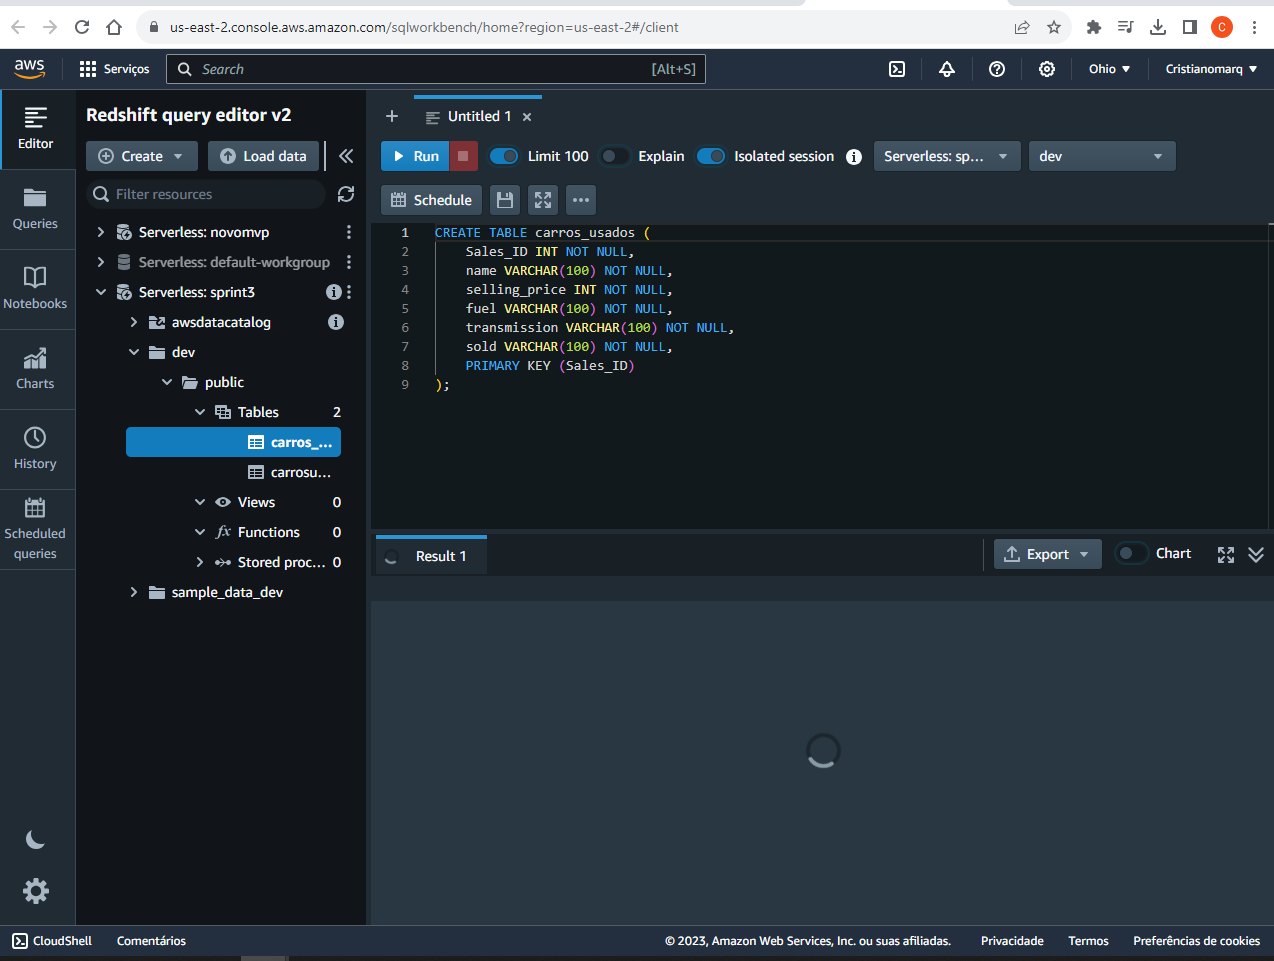

# **OBSERVAÇÃO:**

*Para as consultas optou-se em faze-las com uma combinação de Python e SQL para que os códigos das consultas pudessem ser rodados e validados no momento da avaliação do trabalho.*

In [11]:
# Biblioteca
import sqlite3

In [22]:
# Conectar ao banco de dados SQLite (isso criará o arquivo 'carros_usados.db' se ele não existir)
conexao = sqlite3.connect('carros_usados.db')

# Carregar o arquivo CSV em um DataFrame do pandas
url_csv = 'https://raw.githubusercontent.com/Cristiano1120/datascience/main/UserCarData.csv'
df = pd.read_csv(url_csv)

# Salvar o DataFrame no banco de dados SQLite (a tabela será chamada 'carros')
df.to_sql('carros', conexao, if_exists='replace', index=False)

# Fechar a conexão com o banco de dados
conexao.close()

In [24]:
# Conectar ao banco de dados SQLite
conexao = sqlite3.connect('carros_usados.db')

# Carregar os dados da tabela 'carros' em um DataFrame Pandas
df = pd.read_sql_query('SELECT * FROM carros LIMIT 20', conexao)

# Exibir as primeiras 20 linhas do DataFrame
print(df)

    Sales_ID      name  year  selling_price  km_driven   Region  \
0          1    Maruti  2014         450000     145500     East   
1          2     Skoda  2014         370000     120000     East   
2          3     Honda  2006         158000     140000  Central   
3          4   Hyundai  2010         225000     127000  Central   
4          5    Maruti  2007         130000     120000     East   
5          6   Hyundai  2017         440000      45000     East   
6          7    Maruti  2007          96000     175000     West   
7          8    Maruti  2001          45000       5000     West   
8          9    Toyota  2011         350000      90000     West   
9         10      Ford  2013         200000     169000  Central   
10        11   Renault  2014         500000      68000     East   
11        12    Maruti  2005          92000     100000  Central   
12        13    Maruti  2009         280000     140000  Central   
13        15    Maruti  2009         180000      90000     Eas

In [25]:
# Selecionar apenas as colunas desejadas e as 20 primeiras linhas
query = 'SELECT Sales_ID, name, selling_price, fuel, transmission, sold FROM carros LIMIT 20'

# Carregar os dados da consulta em um DataFrame Pandas
df = pd.read_sql_query(query, conexao)

# Exibir as primeiras 20 linhas das colunas selecionadas
print(df)

    Sales_ID      name  selling_price    fuel transmission sold
0          1    Maruti         450000  Diesel       Manual    Y
1          2     Skoda         370000  Diesel       Manual    Y
2          3     Honda         158000  Petrol       Manual    Y
3          4   Hyundai         225000  Diesel       Manual    Y
4          5    Maruti         130000  Petrol       Manual    Y
5          6   Hyundai         440000  Petrol       Manual    Y
6          7    Maruti          96000     LPG       Manual    Y
7          8    Maruti          45000  Petrol       Manual    Y
8          9    Toyota         350000  Diesel       Manual    Y
9         10      Ford         200000  Diesel       Manual    Y
10        11   Renault         500000  Diesel       Manual    Y
11        12    Maruti          92000  Petrol       Manual    Y
12        13    Maruti         280000  Diesel       Manual    Y
13        15    Maruti         180000  Petrol       Manual    Y
14        16  Mahindra         400000  P

In [29]:
# Consulta SQL para calcular a média dos preços de venda por marca e ordenar por preço médio decrescente
query = '''
    SELECT name AS Marca, ROUND(AVG(selling_price), 2) AS PreçoMédio
    FROM carros
    GROUP BY name
    ORDER BY PreçoMédio DESC
'''

# Formatar os valores da coluna PreçoMédio com duas casas decimais e separador de milhar
df['PreçoMédio'] = df['PreçoMédio'].apply(lambda x: f'R$ {x:,.2f}')

# Exibir o DataFrame resultante
print(df)

         Marca       PreçoMédio
0        Lexus  R$ 5,150,000.00
1          BMW  R$ 4,153,813.56
2         Land  R$ 3,608,333.33
3        Volvo  R$ 3,272,014.93
4       Jaguar  R$ 2,915,464.79
5         Audi  R$ 2,612,199.92
6     Mercedes  R$ 2,470,444.44
7         Jeep  R$ 2,149,612.87
8        Isuzu  R$ 1,942,000.00
9           MG  R$ 1,783,333.33
10         Kia  R$ 1,504,500.00
11      Toyota  R$ 1,011,920.31
12       Force    R$ 887,500.00
13  Mitsubishi    R$ 817,500.00
14    Mahindra    R$ 630,021.07
15       Skoda    R$ 609,721.12
16       Honda    R$ 596,920.89
17        Ford    R$ 520,873.67
18  Volkswagen    R$ 489,891.88
19     Hyundai    R$ 473,280.47
20      Nissan    R$ 465,407.36
21     Renault    R$ 462,618.38
22      Maruti    R$ 409,011.14
23        Tata    R$ 361,853.83
24        Fiat    R$ 317,195.07
25      Datsun    R$ 314,599.95
26       Ashok    R$ 300,000.00
27   Chevrolet    R$ 273,867.48
28  Ambassador    R$ 124,000.00
29      Daewoo     R$ 77,000.00
30      

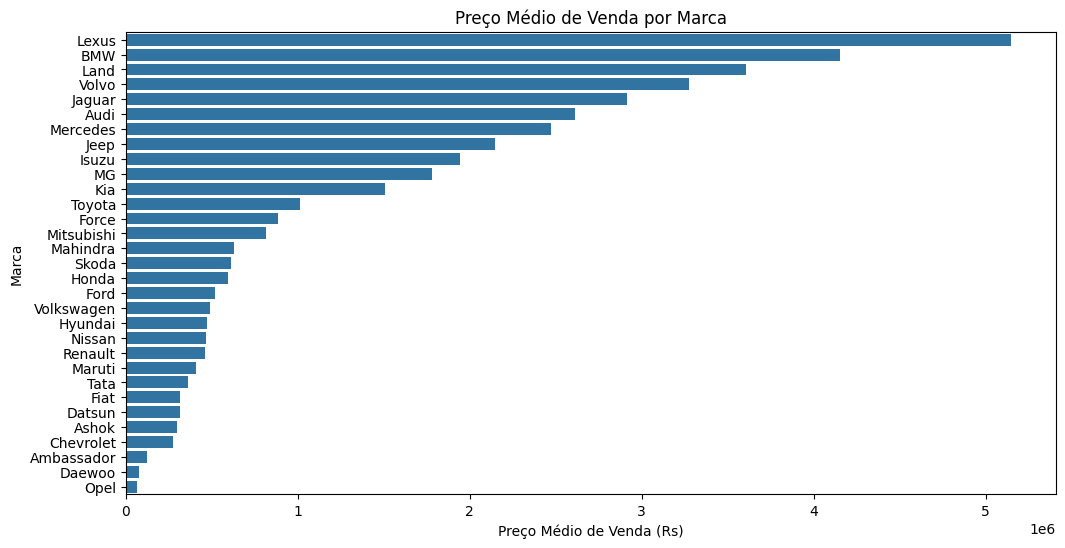

In [57]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras usando sns.barplot
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df, x='PreçoMédio', y='Marca', color=base_color)
ax.set(xlabel='Preço Médio de Venda (Rs)', ylabel='Marca', title='Preço Médio de Venda por Marca')

# Exibir o gráfico
plt.show()

In [35]:
# Conectar ao banco de dados SQLite
conexao = sqlite3.connect('carros_usados.db')

# Consulta SQL para calcular a média dos preços de venda por tipo de combustível
query = '''
    SELECT fuel AS Combustível, ROUND(AVG(selling_price), 2) AS PreçoMédio
    FROM carros
    GROUP BY fuel
    ORDER BY PreçoMédio DESC
'''

# Carregar os dados da consulta em um DataFrame Pandas
df = pd.read_sql_query(query, conexao)

# Formatar os valores da coluna PreçoMédio com duas casas decimais e separador de milhar
df['PreçoMédio'] = df['PreçoMédio'].apply(lambda x: f'R$ {x:,.2f}')

# Exibir o DataFrame resultante
print(df)

  Combustível     PreçoMédio
0      Diesel  R$ 802,450.28
1      Petrol  R$ 472,665.20
2         CNG  R$ 317,903.79
3         LPG  R$ 210,885.71


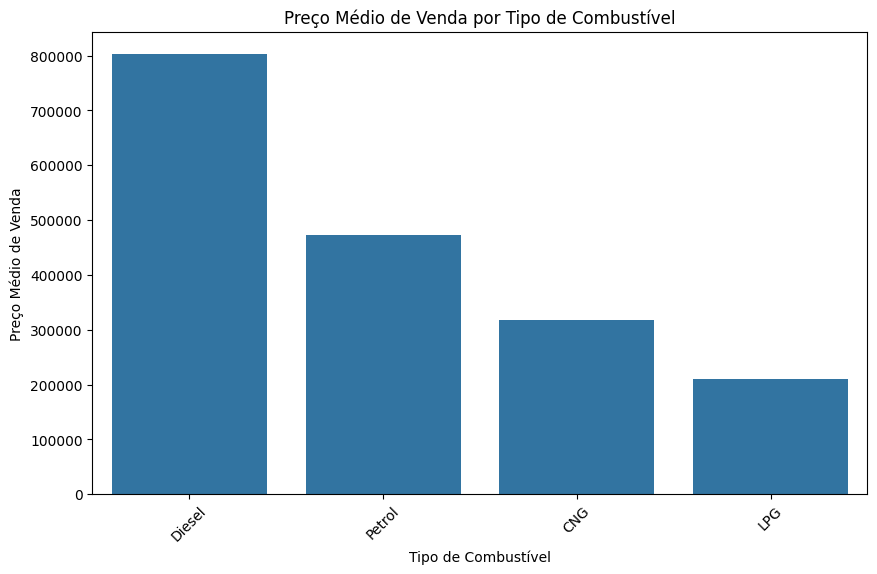

In [62]:
# Consulta SQL para calcular a média dos preços de venda por tipo de combustível
query = '''
    SELECT fuel AS Combustível, ROUND(AVG(selling_price), 2) AS PreçoMédio
    FROM carros
    GROUP BY Combustível
    ORDER BY PreçoMédio DESC
'''

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras usando sns.barplot
base_color = sns.color_palette()[0]
ax = sns.barplot(data=df, x='Combustível', y='PreçoMédio', color=base_color)
ax.set(xlabel='Tipo de Combustível', ylabel='Preço Médio de Venda', title='Preço Médio de Venda por Tipo de Combustível')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [64]:
# Consulta SQL para calcular a relação entre tipo de transmissão e status vendido
query = '''
    SELECT transmission AS Transmissão,
           COUNT(*) AS TotalCarros,
           SUM(CASE WHEN sold = 'Y' THEN 1 ELSE 0 END) AS CarrosVendidos,
           ROUND(SUM(CASE WHEN sold = 'Y' THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS PorcentagemVendidos
    FROM carros
    GROUP BY transmission
'''

# Carregar os dados da consulta em um DataFrame Pandas
df = pd.read_sql_query(query, conexao)

# Exibir o DataFrame resultante
print(df)

  Transmissão  TotalCarros  CarrosVendidos  PorcentagemVendidos
0   Automatic         1041             286                  0.0
1      Manual         6865            1714                  0.0


In [41]:
# Consulta SQL para calcular o número de carros vendidos e não vendidos por marca
query = '''
    SELECT name AS Marca,
           COUNT(*) AS TotalCarros,
           SUM(CASE WHEN sold = 'Y' THEN 1 ELSE 0 END) AS CarrosVendidos,
           SUM(CASE WHEN sold = 'N' THEN 1 ELSE 0 END) AS CarrosNaoVendidos
    FROM carros
    GROUP BY name
    ORDER BY CarrosVendidos DESC
'''

# Carregar os dados da consulta em um DataFrame Pandas
df = pd.read_sql_query(query, conexao)

# Exibir o DataFrame resultante
print(df)

         Marca  TotalCarros  CarrosVendidos  CarrosNaoVendidos
0       Maruti         2367             597               1770
1      Hyundai         1360             332               1028
2     Mahindra          758             201                557
3         Tata          719             178                541
4       Toyota          452             126                326
5        Honda          466             124                342
6         Ford          388              92                296
7      Renault          228              56                172
8    Chevrolet          230              56                174
9   Volkswagen          185              39                146
10      Nissan           81              33                 48
11         BMW          118              29                 89
12      Jaguar           71              21                 50
13       Skoda          104              20                 84
14       Volvo           67              19            

# **ANALISE DOS DADOS**


***a) Qualidade dos dados:***

Os dados estão atualizados e as informações são as mesmas desde o upload das informações, ou seja, mantiveram a integridade e não foram corrompidos ou manipulados indevidamente, e sim são considerados confiáveis;

Os dados selecionados para a a tarefa são relevantes para a análise poís, as informações desnecessárias foram filtradas;

Os dados estão em um formato adequado para análise, pois, a estrutura dos dados é intuitiva e bem organizada.

E quanto a privacidade dos dados eles foram estraídos do Kaggle, ou seja, são dados publicos.

***b) Solução do problema:***



Em relação aos resultados obtidos (solução do problema), chegamos ao resultado esperado, uma vez que:

a)	A relação entre marca e preço foi atendida pois, evidenciamos o  ranking das marcas e preço médio de venda, na tabela ‘Preço Médio de Venda por Marca’, onde tivemos as três marcas Lexus, BMW e Land no topo do ranking;

b)	Concomitantemente, evidenciamos que a relação tipo de transmissão e status de venda, chegou-se ao resultado que os carros usados de transmissão automático são os mais vendidos na relação carros vendidos;

c)	Por fim, a relação  tipo de combustível, os automóveis usados a diesel tem o maior preço de venda, entre outras relações possíveis que podemos fazer com base aos atributos elegidos para este exercicio.


# **Autoavalição**

Realizamos aqui uma autoavaliação sobre o estudo e a perspectiva dos resultados obtidos na disciplina, e em relação a metodologia do trabalho foram abordados de maneira resumida os conceitos encontrados no conteúdo da disciplina, e chegamos aos resultados esperados neste sentido. Também ressalto, que o exercício realizado trata-se de um case muito simples, pois, pretendi esboçar de maneira resumida e sucinta alguns dos tópicos abordados nas aulas e nos plantões de dúvidas. Por fim,   para os próximos estudos com base neste dataset, poder-se-ia, separa-lo em duas tabelas as informações desse conjunto de dados e posteriormente realizar consultas com base nos relacionamentos entre as tabelas criadas, o que seria perfeitamente aplicável, e por restrições de tempo não aplicamos neste trabalho.   